# Marketing Platform Analysis for Optimization

## Introduction

This project consists of three different datasets, which are :

1. Data of server log of users' visit to Y.Afisha website on June 2017 - May 2018
2. Data of all purchase order on June 2017 - May 2018
3. Data of daily marketing costs

### Goals :

This project aims to analyze each marketing platform used by Y.Afisha store for marketing optimization

### Steps :
1. Generate Information of Datasets
2. Data Preprocessing
3. Exploratory Data Analysis
4. Calculate the Business Metrics

## General Information & Data Preprocessing

Import Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import math
import numpy as np
import seaborn as sns

Read all three datasets.

In [2]:
try :
    visits = pd.read_csv('visits_log_us.csv')
    orders = pd.read_csv('orders_log_us.csv')
    costs = pd.read_csv('costs_us.csv')

except :
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')

### Visits Table

Checking general information of the first dataset, that consists of :
- Uid : User ID
- Device : user's device
- Start Ts : date & time of session started
- End Ts : date & time of session ended
- Source Id : source ID of where user click the website from 

In [3]:
visits.info()
visits.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


(359400, 5)

In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


Checking dataset to look for any duplicate or missing values.

In [6]:
visits.isna().sum() #checking missing values in visit table data

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
visits.duplicated().sum() #checking duplicate in visit table data

0

There are no found any duplicate or missing values on dataset. However, date and time columns are in incorrect data type, thus, data type of column `End Ts`, and `Start Ts` need to be fixed. In addition, for optimising memory data usage, data type for column `Device` will be transformed to category type.

In [8]:
#fixing data type for column 'End Ts'
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')

#fixing data type for column 'Start Ts'
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')

#transform data type for column 'Device' to be category type
visits['Device'] = visits['Device'].astype('category') 

#checking general information of data after fixing
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


### Orders Table

Checking general information of second dataset consist of :
- Uid : User ID who make the order
- Buy Ts : date & time of the order
- Revenue : revenue Y.Afisha of each order

In [9]:
orders.info()
orders.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


(50415, 3)

In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


On detail above, it is shown that the minimum revenue, made by one of the orders, is `$ 0.00`, and the maximum revenue is `$ 2633.28`. In this table, `$ 0.00` revenue convey that there are some users that do not make the order until payment, or do only window shopping. In order to have relevant dataset, revenue table need to be filtered on the stage of analyzing.

Checking dataset to look for any duplicate or missing values.

In [12]:
orders.isna().sum() #checking missing values on order table data

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [13]:
orders.duplicated().sum() #checking duplicate on order table data

0

There are no found any duplicate or missing values on dataset. However, `Buy Ts` column is in incorrect data type, thus, need to be fixed.

In [14]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Costs Table

Checking general information of dataset, consist of :
- source_id : source ID of where the advertisement from
- dt : date of advertizing
- costs : cost of each advertisement on each date

In [15]:
costs.info()
costs.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


(2542, 3)

In [16]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


On detail above, it is shown that the minimum advertizing cost/day is `$0.54`, and the maximum one is `$1788.28`, with cost median `$77.29`. The variety total cost/day is caused by the variety of source id itself where the ad being advertised at.

Checking dataset to look for any duplicate or missing values in the data.

In [18]:
costs.isna().sum() #checking missing values on costs table data

source_id    0
dt           0
costs        0
dtype: int64

In [19]:
costs.duplicated().sum() #checking duplicate on costs table data

0

There are no found any duplicate or missing values on dataset. However, `dt` column is in incorrect data type, thus, need to be fixed.

In [20]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Compiling and Analyzing the Data

### Product Analyzing

Checking how many users using the product on daily, weekly, and monthly basis.

In order to have the data of user who buy the product, visits table and orders table need to be merged based on User ID.

In [21]:
df_merged = visits.merge(orders, 
                         on=['Uid'], 
                         how='inner'
                        )[['Device', 'Source Id', 'Uid', 'Revenue', 'Start Ts', 'Buy Ts', 'End Ts']]
df_merged

,Device,Source Id,Uid,Revenue,Start Ts,Buy Ts,End Ts
0,desktop,9,16174680259334210214,2.33,2018-05-20 10:59:00,2018-03-09 20:25:00,2018-05-20 11:23:00
1,desktop,4,16174680259334210214,2.33,2018-03-09 20:05:00,2018-03-09 20:25:00,2018-03-09 20:33:00
2,desktop,5,16007536194108375387,2.44,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-03 21:36:00
3,desktop,5,16007536194108375387,1.53,2017-09-03 21:35:00,2017-10-28 00:01:00,2017-09-03 21:36:00
4,desktop,5,16007536194108375387,1.53,2017-09-03 21:35:00,2017-10-28 19:16:00,2017-09-03 21:36:00
...,...,...,...,...,...,...,...
761802,desktop,3,6752020629696526518,4.15,2017-12-04 12:42:00,2017-12-04 12:46:00,2017-12-04 12:50:00
761803,desktop,4,11750532881998794555,3.67,2017-11-20 23:33:00,2017-11-20 23:43:00,2017-11-20 23:44:00
761804,touch,4,11202626539189016002,3.05,2017-11-29 20:27:00,2017-11-29 20:33:00,2017-11-29 20:48:00
761805,desktop,10,12734910664455613822,0.49,2018-04-23 21:11:00,2018-04-23 21:16:00,2018-04-23 21:19:00


As it is shown on table above, some date & time details on columns : `Start Ts`, `Buy Ts`, and `End Ts` are in incorrect order, whereas the time should be all in order time. For example, on index number 2 : session started at `21:35` and ended at `21:36`, yet the buying time is on different date of the sessions, instead of in between them.

Therefore, dataset need to be filtered as sequence of time : `Buy Ts` is in between `Start Ts`, and `End Ts`.

In [22]:
df_merged = df_merged[(df_merged['Buy Ts'] > df_merged['Start Ts']) & (df_merged['Buy Ts'] < df_merged['End Ts'])].reset_index()
df_merged

,index,Device,Source Id,Uid,Revenue,Start Ts,Buy Ts,End Ts
0,1,desktop,4,16174680259334210214,2.33,2018-03-09 20:05:00,2018-03-09 20:25:00,2018-03-09 20:33:00
1,12,desktop,3,16007536194108375387,1.53,2017-10-27 23:56:00,2017-10-28 00:01:00,2017-10-28 00:04:00
2,29,desktop,3,16007536194108375387,2.44,2017-09-04 12:44:00,2017-09-04 12:46:00,2017-09-04 12:51:00
3,797,desktop,2,8056418121947262981,4.28,2017-10-28 14:29:00,2017-10-28 14:32:00,2017-10-28 14:37:00
4,1602,desktop,1,8056418121947262981,3.67,2017-06-26 08:13:00,2017-06-26 09:14:00,2017-06-26 09:16:00
...,...,...,...,...,...,...,...,...
29578,761802,desktop,3,6752020629696526518,4.15,2017-12-04 12:42:00,2017-12-04 12:46:00,2017-12-04 12:50:00
29579,761803,desktop,4,11750532881998794555,3.67,2017-11-20 23:33:00,2017-11-20 23:43:00,2017-11-20 23:44:00
29580,761804,touch,4,11202626539189016002,3.05,2017-11-29 20:27:00,2017-11-29 20:33:00,2017-11-29 20:48:00
29581,761805,desktop,10,12734910664455613822,0.49,2018-04-23 21:11:00,2018-04-23 21:16:00,2018-04-23 21:19:00


Checking order QTY of each Source ID based on filtered dataset.

<AxesSubplot:title={'center':'Order QTY by Source ID'}, xlabel='Source Id', ylabel='Order Quantity'>

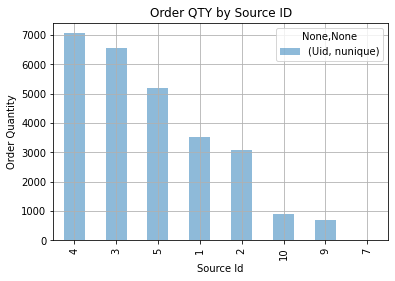

In [23]:
source = df_merged.groupby('Source Id').agg({'Uid': ['nunique']}).sort_values(by=('Uid', 'nunique'), ascending=False)
source.plot(kind='bar', alpha=0.5, grid=True, xlabel = 'Source Id', ylabel = 'Order Quantity', title = 'Order QTY by Source ID')

As it is shown on graph above, Source ID number 10, 9, and 7 are the least sources of where the order from. Meanwhile the top two sources are number 4 and 3 that reach above 7000 and 6000 each. This findings need further analysis on the next stages.

Checking daily purchase order by each `Uid`.

In [24]:
df_merged['date'] = df_merged['Buy Ts'].dt.date #adding column date to dataframe from `Buy Ts`

count    364.000000
mean      79.200549
std       43.056128
min        1.000000
25%       49.750000
50%       76.000000
75%      100.250000
max      435.000000
Name: Uid, dtype: float64

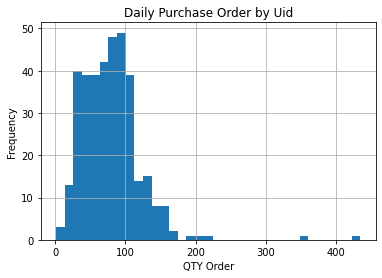

In [25]:
df_merged.groupby('date')['Uid'].nunique().reset_index().hist(bins=35) #daily purchase order by each `Uid`
plt.title('Daily Purchase Order by Uid')
plt.xlabel('QTY Order')
plt.ylabel('Frequency')

df_merged.groupby('date')['Uid'].nunique().describe() #showing statistic description of daily purchase

Data above conveys that there are approximately 76 order per day most of the time, with maximum total purchase order 435/day, and 1 order/day as the minimum.

Checking weekly purchase order by each `Uid`.

In [26]:
df_merged['week'] = df_merged['Buy Ts'].dt.week #adding column week from `Buy Ts`

/tmp/ipykernel_74/4053154680.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_merged['week'] = df_merged['Buy Ts'].dt.week #adding column week from `Buy Ts`


count      52.000000
mean      535.557692
std       216.326135
min       176.000000
25%       369.750000
50%       535.000000
75%       673.000000
max      1050.000000
Name: Uid, dtype: float64

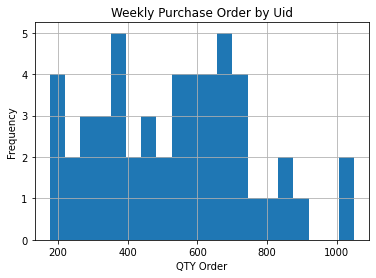

In [27]:
df_merged.groupby('week')['Uid'].nunique().hist(bins=20) #weekly purchase order by each `Uid`
plt.title('Weekly Purchase Order by Uid')
plt.xlabel('QTY Order')
plt.ylabel('Frequency')

df_merged.groupby('week')['Uid'].nunique().describe() #showing statistic description of weekly purchase

Data above conveys that there are mostly 535 order per week, with maximum total purchase order 1050/week, and 176 order/week as the minimum.

Checking monthly purchase order by each `Uid`.

In [28]:
df_merged['month'] = df_merged['Buy Ts'].dt.month

count      12.000000
mean     2245.166667
std       765.580924
min      1013.000000
25%      1631.250000
50%      2383.000000
75%      2768.000000
max      3322.000000
Name: Uid, dtype: float64

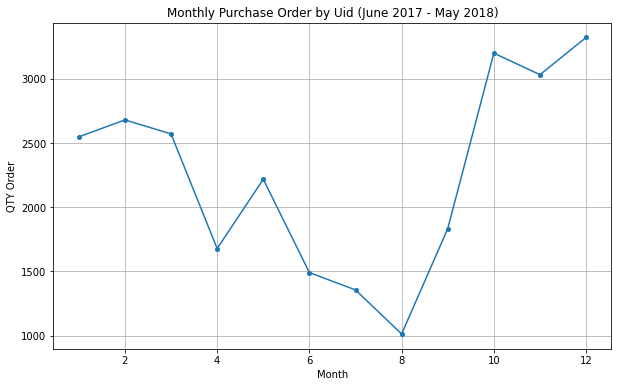

In [30]:
df_merged.groupby('month')['Uid'].nunique().plot(kind='line', grid=True, marker='o', markersize=4, figsize=(10, 6)) #monthly purchase order by each `Uid`
plt.title('Monthly Purchase Order by Uid (June 2017 - May 2018)')
plt.xlabel('Month')
plt.ylabel('QTY Order')

df_merged.groupby('month')['Uid'].nunique().describe() #showing statistic description of monthly purchase

Data above conveys that there are mostly 2383 order per month, with maximum total purchase order 3322/month, and 1013 order/month as the minimum. Highest total amount purchase order is on October, November, and December 2017 that reach above 3000 purchase order per month. 

Checking number of session per day.

count    364.000000
mean      81.271978
std       44.716926
min        1.000000
25%       49.750000
50%       78.000000
75%      103.000000
max      462.000000
Name: Uid, dtype: float64

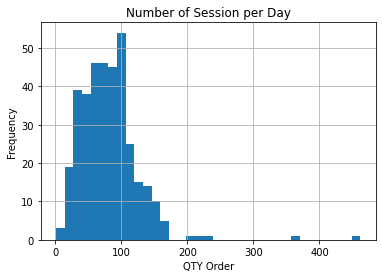

In [31]:
df_merged.groupby('date')['Uid'].count().reset_index().hist(bins=35) #daily total amount of session
plt.title('Number of Session per Day')
plt.xlabel('QTY Order')
plt.ylabel('Frequency')

df_merged.groupby('date')['Uid'].count().describe() #showing statistic description of daily total amount of session

Data above conveys that there are mostly 78 session per day, with maximum total session 462/day, and 1 session/day as the minimum.

Checking minutes duration per session.

In [32]:
df_merged['minutes_duration'] = (df_merged['End Ts'] - df_merged['Start Ts']).dt.total_seconds() / 60

count    29583.000000
mean        22.708887
std         23.499054
min          2.000000
25%          8.000000
50%         16.000000
75%         30.000000
max        412.000000
Name: minutes_duration, dtype: float64

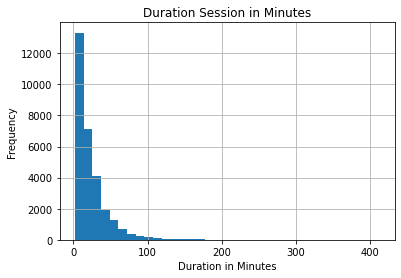

In [33]:
df_merged['minutes_duration'].hist(bins=35)
plt.title('Duration Session in Minutes')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')

df_merged['minutes_duration'].describe()

Data above conveys that mostly user spend 16 minutes per session, with minimum duration 2 minutes/session, and the maximum duration is 412 minutes/session which can be considered as anomaly due to the few frequencies.

Checking reorder frequencies by each user per month.

count    25286.000000
mean         0.097495
std          0.137290
min          0.083333
25%          0.083333
50%          0.083333
75%          0.083333
max          8.000000
Name: Start Ts, dtype: float64

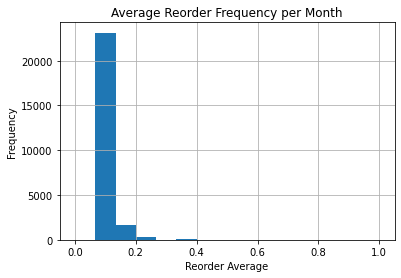

In [34]:
monthly_reorder = df_merged.groupby(['Uid','month']).count().groupby('Uid')['Start Ts'].sum() / 12

monthly_reorder.hist(bins=15, range=(0,1))
plt.title('Average Reorder Frequency per Month')
plt.xlabel('Reorder Average')
plt.ylabel('Frequency')

monthly_reorder.describe()

The graph above showing total amount frequency of monthly reorder average done only once by each user within one year. It is shown that more than 20000 user make one order only in a year.

Text(0, 0.5, 'Frequency')

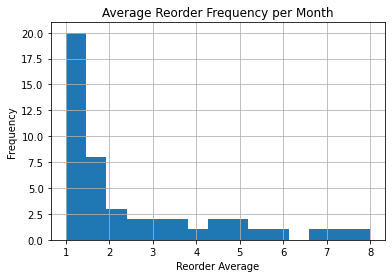

In [35]:
monthly_reorder.hist(bins=15, range=(1,8))
plt.title('Average Reorder Frequency per Month')
plt.xlabel('Reorder Average')
plt.ylabel('Frequency')

Meanwhile, the graph above showing total amount frequency of monthly reorder average done more than once by each user within one year. It is shown that there are only 20 users approximately that make at least one reorder per month.

### Product Selling Analysis

Checking the time period of each user when making the first order after the first sign up (conversion rate).

Filtering data of each user of their first purchase order.

In [36]:
df_tmp1 = orders[['Uid', 'Buy Ts', 'Revenue']].groupby('Uid').min().reset_index()

Filtering data of each user of their first sign up.

In [37]:
df_tmp2 = visits[['Uid', 'Start Ts', 'Source Id']].groupby('Uid').min().reset_index()

Merging both filtered data above.

In [38]:
df_conv = df_tmp1.merge(df_tmp2, on = 'Uid', how='inner')

Make `conversion_days` column which is the period of time of each user in making the first order after the first sign up in days.

In [39]:
df_conv['conversion_days'] = (df_conv['Buy Ts'] - df_conv['Start Ts']).dt.days

0     26363
1      1011
2       563
3       434
4       324
5       270
6       260
7       218
8       189
10      140
Name: conversion_days, dtype: int64

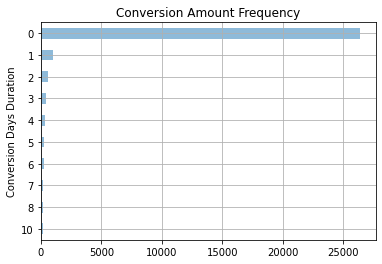

In [40]:
df_conv['conversion_days'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh', 
                                                                                grid = True, 
                                                                                alpha= 0.5,
                                                                               xlabel = 'Conversion Days Duration',
                                                                                title = 'Conversion Amount Frequency')

df_conv['conversion_days'].value_counts()[:10]

Data above shows that there are 26363 users that make their first order on the same day of their first sign up, and there are more than 1000 users who make the first order on the next day of their first sign up. It is concluded that most of users make their first purchase order on the same day of their first sign up.

Let's checking the most effective marketing channel that converting users to be buyers within one week.

<AxesSubplot:title={'center':'Conversion within 1 Week by Source Id'}, xlabel='Source Id', ylabel='QTY'>

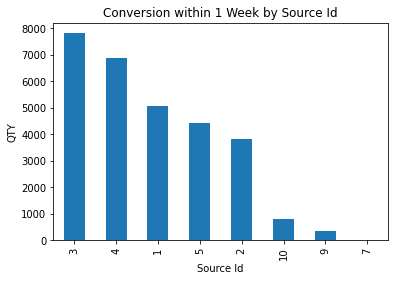

In [41]:
oneweek_conv = df_conv[df_conv['conversion_days'] < 7] #filtering `conversion_days` below 7 days
oneweek_conv.groupby('Source Id')['Uid'].count().sort_values(ascending = False).plot(kind='bar',
                                                                                     title = 'Conversion within 1 Week by Source Id',
                                                                                     ylabel = 'QTY')

It is shown that marketing channel Id Number 3 has the highest conversion rate that almost 8000 users converted to be users under one week. Meanwhile, there is marketing channel Id Number 7 at the bottom position with the least conversion rate, under 250 users only approximately.

Checking monthly purchase order quantity.

In [42]:
df_conv['month'] = df_conv['Buy Ts'].dt.month

count      12.000000
mean     3043.583333
std      1007.713926
min      1370.000000
25%      2213.000000
50%      3180.500000
75%      3758.500000
max      4383.000000
Name: Uid, dtype: float64

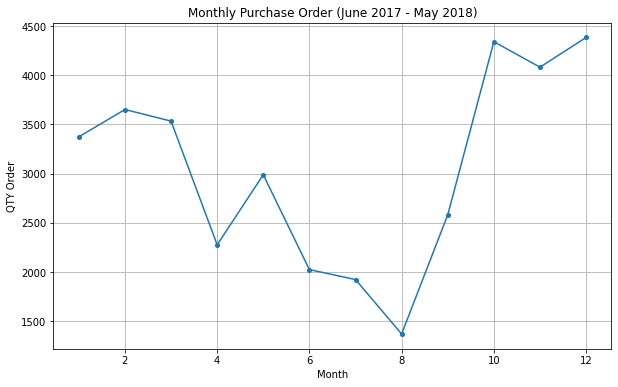

In [43]:
df_conv.groupby('month')['Uid'].count().plot(kind='line', grid=True, marker='o', markersize=4, figsize=(10, 6)) #monthly purchase order
plt.title('Monthly Purchase Order (June 2017 - May 2018)')
plt.xlabel('Month')
plt.ylabel('QTY Order')

df_conv.groupby('month')['Uid'].count().describe() #showing statistic description of monthly purchase

The graph shows that October - December 2017 make the highest purchase order that reach more than 4000 order quantity per month. Meanwhile the lowest order quantity is on August 2017 that only make 1370 order in a month. And average monthly order quantity is on 3180 purchase order.  

Checking monthly lifetime value of each Source Id.

In [44]:
source_groups = df_conv.groupby(['Source Id', 'month']) #grouping data by month and Source Id

In [45]:
revenue_per_source = source_groups['Revenue'].sum() #totaling revenue by each source ID

In [46]:
customers_per_source = source_groups['Uid'].nunique() #calculating total of user by each source ID

In [47]:
source_revenue_mean = revenue_per_source / customers_per_source #calculating average revenue by each source ID

In [48]:
lifetime_per_source = source_groups['conversion_days'].mean() #calculating users' lifetime mean by each source ID
ltv_per_source = source_revenue_mean * lifetime_per_source #calculating average montly LTV by each source ID
ltv_per_source.reset_index()

,Source Id,month,0
0,1,1,108.406137
1,1,2,101.872382
2,1,3,150.012330
3,1,4,163.274046
4,1,5,219.888722
...,...,...,...
80,10,8,0.076389
81,10,9,3.019104
82,10,10,4.676196
83,10,11,4.500877


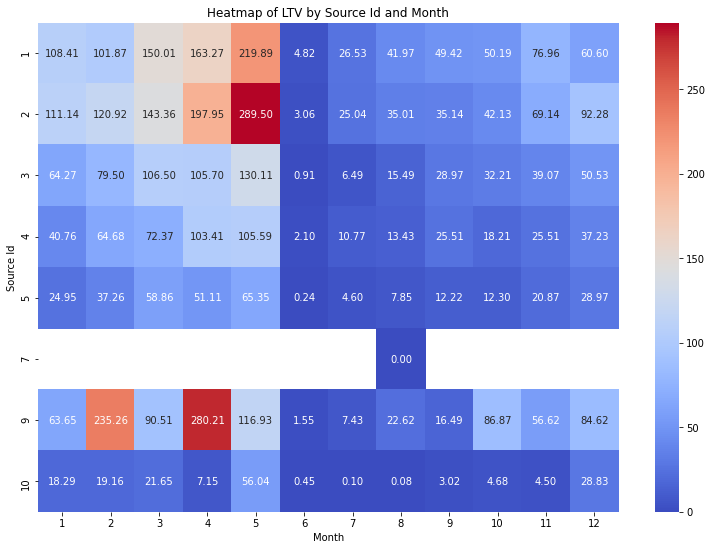

In [49]:
pivot_ltv = ltv_per_source.reset_index().pivot_table(index='Source Id', columns='month', values = 0)

plt.figure(figsize=(13, 9))
sns.heatmap(pivot_ltv, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of LTV by Source Id and Month')
plt.xlabel('Month')
plt.ylabel('Source Id')
plt.show()

It is shown that Source Id with highest LTV are Source Id number : 1, 2, and 9, meanwhile the lowest one is Source Id number 7, considering there are very few purchase order quantity on this channel. It is also concluded that LTV on January - May 2018 are higher than the one on June - December 2017.

### Marketing Analysis

Checking monthly customer acquisition cost of each source id.

In [50]:
costs['month'] = costs['dt'].dt.month #adding column month to table `costs`

Rename `source_id` column in table `costs` to match the one in table `df_conv` for calculating, to be `Source Id`.

In [51]:
costs = costs.rename(columns={'source_id' : 'Source Id'}) 

Calculate total monthly cost of each source id.

In [52]:
total_ad_costs = costs.groupby(['Source Id', 'month'])['costs'].sum()

Divide total cost to total users, that has been calculated before based on table `df_conv`, to have acquisition cost per customer.

In [53]:
acquisition_cost = total_ad_costs / customers_per_source
acquisition_cost.reset_index()

,Source Id,month,0
0,1,1,3.426614
1,1,2,3.412508
2,1,3,2.800429
3,1,4,3.395115
4,1,5,2.982947
...,...,...,...
80,10,8,10.111739
81,10,9,9.213400
82,10,10,4.480286
83,10,11,10.707568


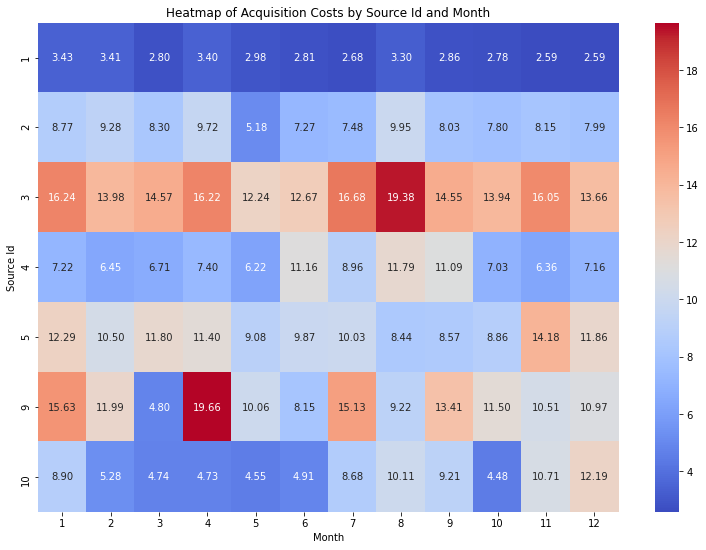

In [54]:
pivot_acquisition = acquisition_cost.reset_index().pivot_table(index='Source Id', columns='month', values = 0)

plt.figure(figsize=(13, 9))
sns.heatmap(pivot_acquisition, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of Acquisition Costs by Source Id and Month')
plt.xlabel('Month')
plt.ylabel('Source Id')
plt.show()

It is shown on the graph above that source Id number 3 and 9 have the highest acquisition cost, and the one with the fewest acquisition cost is source Id number 1. Meanwhile, it is not to be seen there is any particular distinct total cost based on the period of time.

Checking monthly return of investment of each source Id.

In [55]:
orders['month'] = orders['Buy Ts'].dt.month #adding column month to table orders

Calculate total monthly revenue, and divide it to total costs to have total return of investment of each source id.

In [56]:
revenue = orders.groupby(['month'])['Revenue'].sum()
roi = (revenue - total_ad_costs) / total_ad_costs
roi

Source Id  month
1          1         7.881762
           2        10.594816
           3        14.231495
           4        11.699199
           5        13.129081
                      ...    
10         8        36.660833
           9        38.823540
           10       43.620400
           11       33.163676
           12       55.341312
Length: 84, dtype: float64

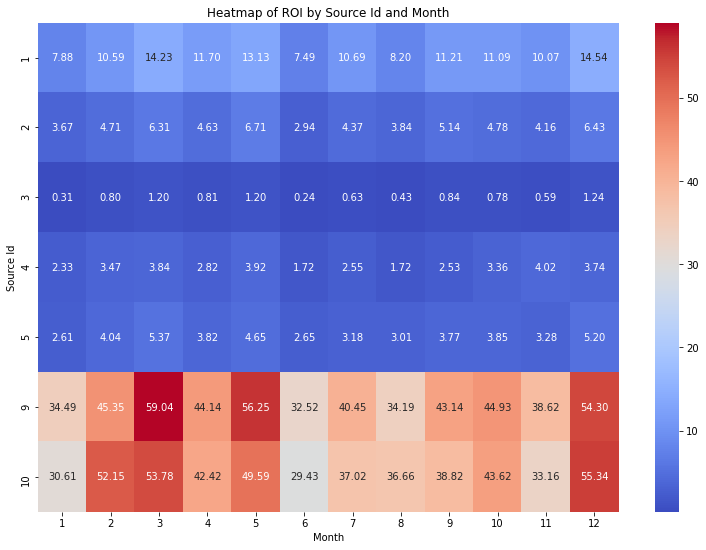

In [57]:
pivot_roi = roi.reset_index().pivot_table(index='Source Id', columns='month', values = 0)

plt.figure(figsize=(13, 9))
sns.heatmap(pivot_roi, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of ROI by Source Id and Month')
plt.xlabel('Month')
plt.ylabel('Source Id')
plt.show()

It is shown on heatmap above that source id number 9 and 10 have the highest ROI (return of investment), while the lowest one is source id number 3. It is also not to be seen any significant difference of ROI based on the period of time.

## Conclusion

After calculating LTV (lifetime value), CAC (customer acquisition cost), and ROI (return of investment) of each source Id , source Id number 1 is the recommended platform for Y.Afisha store, considering it is one of the platform that has the highest LTV and the lowest CAC compare to the other platform. Meanwhile for the ROI, Source Id number 1 does not reach the highest value yet it is not at the bottom position also, as it is in the middle position approximately.